# **Performance Evaluation for Different Dimension Reduction Techniques for High-Dimensional Data**

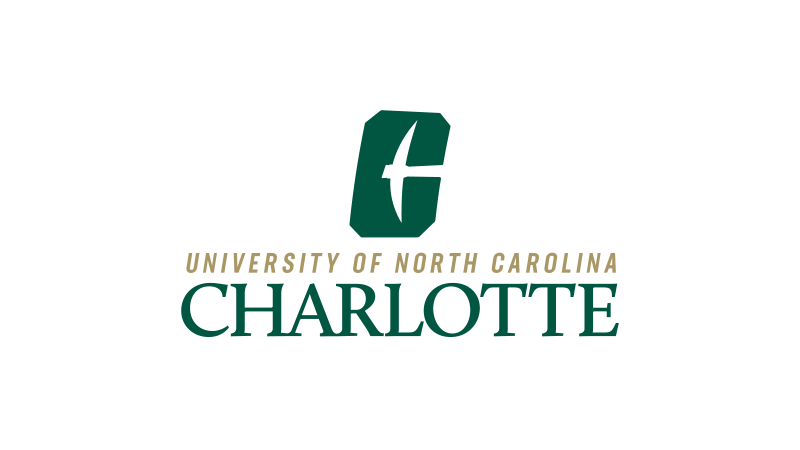


# Introduction

Dataset: The MNIST dataset is a widely-used benchmark for handwritten digit recognition. It consists of 70,000 grayscale images of digits (0 to 9), each with a size of 28x28 pixels.

A fundamental method for visualizing and analyzing high-dimensional data is dimensionality reduction. Gaining insights into the underlying patterns and relationships between the data points becomes more challenging as the dimensionality of the data rises. By reducing the dimensionality of the data while maintaining its useful features, dimensionality reduction techniques like principal component analysis (PCA), t-distributed stochastic neighbor embedding (t-SNE), and uniform manifold approximation and projection (UMAP) can help solve this problem.


 In this presentation, we will visualize the MNIST dataset before and after applying various dimensionality reduction techniques, such as PCA, t-SNE, and UMAP.

**PCA:**

PCA (Principal Component Analysis): PCA is a linear dimensionality reduction technique that identifies the axes with the highest variance in the dataset and projects the data onto these axes.


**t-SNE:**

t-SNE (t-Distributed Stochastic Neighbor Embedding): t-SNE is a non-linear dimensionality reduction technique that minimizes the divergence between probability distributions in high-dimensional and low-dimensional spaces, preserving the structure of the data.


**UMAP:**

UMAP (Uniform Manifold Approximation and Projection): UMAP is another non-linear dimensionality reduction technique that captures both global and local structure in the data by optimizing a manifold learning objective function.

In [ ]:
!pip install umap-learn
!pip install plotly dash
!pip install openTSNE
!pip install plotly
!pip install --upgrade umap-learn
!pip install pyngrok
!pip install -U altair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import time
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import cpu_count
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, pairwise_distances
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from keras.datasets import mnist 
from umap import UMAP
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
from pyngrok import ngrok


#Loading the MNIST dataset

In [ ]:
# Load the MNIST dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Stack the train and test data horizontally
data = np.hstack((train_X.reshape(-1, 784), train_y.reshape(-1, 1)))
data = np.vstack((data, np.hstack((test_X.reshape(-1, 784), test_y.reshape(-1, 1)))))

# Create a pandas DataFrame with the stacked data and labels
data = pd.DataFrame(data, columns=[f'pixel_{i}' for i in range(784)] + ['label'])

# Print the shape of the DataFrame
print("Data shape:", data.shape)

Data shape: (70000, 785)


In [ ]:
data.head(20)

pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0         0        0        0        0        0        0        0        0   
1         0        0        0        0        0        0        0        0   
2         0        0        0        0        0        0        0        0   
3         0        0        0        0        0        0        0        0   
4         0        0        0        0        0        0        0        0   
5         0        0        0        0        0        0        0        0   
6         0        0        0        0        0        0        0        0   
7         0        0        0        0        0        0        0        0   
8         0        0        0        0        0        0        0        0   
9         0        0        0        0        0        0        0        0   
10        0        0        0        0        0        0        0        0   
11        0        0        0        0        0        0        0        0   
12        0        0        0        0        0        0        0        0   
13        0        0        0        0        0        0        0        0   
14        0        0        0        0        0        0        0        0   
15        0        0        0        0        0        0        0        0   
16        0        0        0        0        0        0        0        0   
17        0        0        0        0        0        0        0        0   
18        0        0        0        0        0        0        0        0   
19        0        0        0        0        0        0        0        0   

    pixel_8  pixel_9  ...  pixel_775  pixel_776  pixel_777  pixel_778  \
0         0        0  ...          0          0          0          0   
1         0        0  ...          0          0          0          0   
2         0        0  ...          0          0          0          0   
3         0        0  ...          0          0          0          0   
4         0        0  ...          0          0          0          0   
5         0        0  ...          0          0          0          0   
6         0        0  ...          0          0          0          0   
7         0        0  ...          0          0          0          0   
8         0        0  ...          0          0          0          0   
9         0        0  ...          0          0          0          0   
10        0        0  ...          0          0          0          0   
11        0        0  ...          0          0          0          0   
12        0        0  ...          0          0          0          0   
13        0        0  ...          0          0          0          0   
14        0        0  ...          0          0          0          0   
15        0        0  ...          0          0          0          0   
16        0        0  ...          0          0          0          0   
17        0        0  ...          0          0          0          0   
18        0        0  ...          0          0          0          0   
19        0        0  ...          0          0          0          0   

    pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  label  
0           0          0          0          0          0      5  
1           0          0          0          0          0      0  
2           0          0          0          0          0      4  
3           0          0          0          0          0      1  
4           0          0          0          0          0      9  
5           0          0          0          0          0      2  
6           0          0          0          0          0      1  
7           0          0          0          0          0      3  
8           0          0          0          0          0      1  
9           0          0          0          0          0      4  
10          0          0          0          0          0      3  
11          0          0   

# Random Sampling the MNIST Dataset

Since, the dataset is too large to work with we take a random sub sample of the dataset. With around 10k samples.

In [ ]:
data_subset = data.sample(frac=0.14287)
data_subset.shape

(10001, 785)

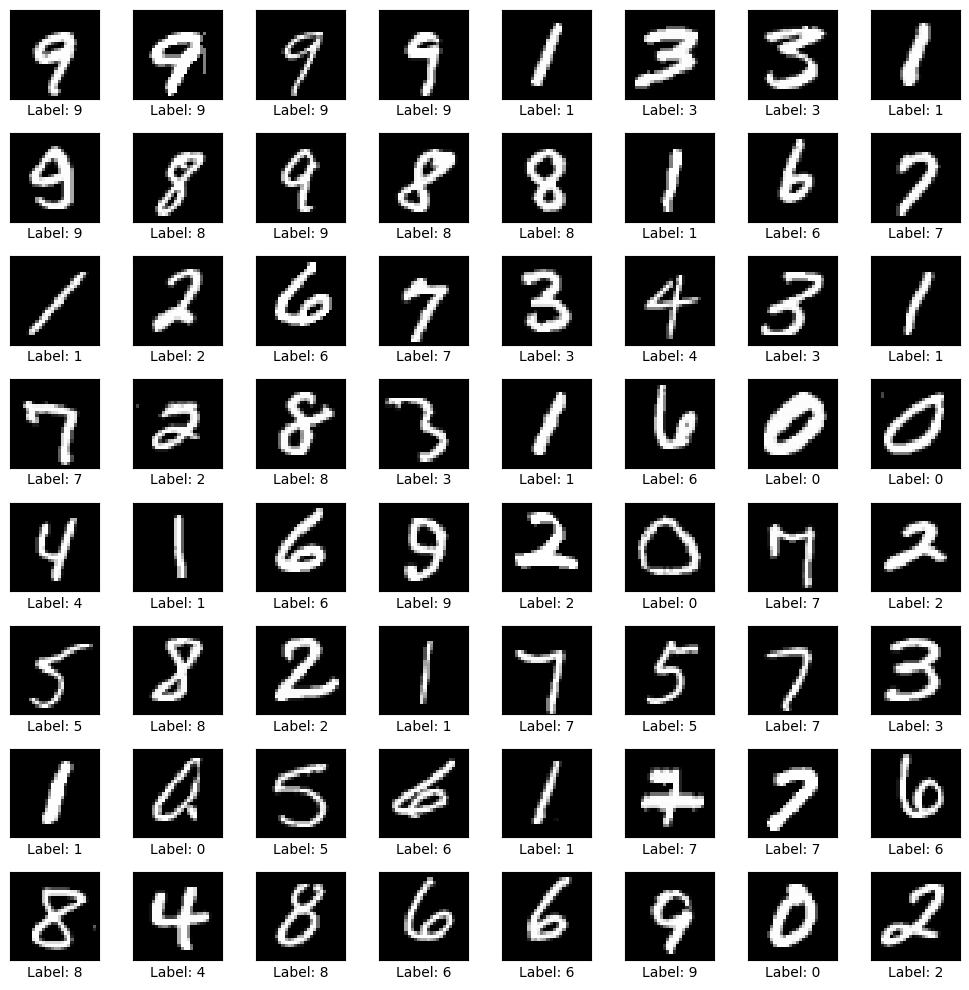

In [ ]:
import random
def visualize_mnist_images(data, num_images=64, grid_size=8):
    indices = random.sample(range(len(data)), num_images)

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        img = data.iloc[indices[i]].drop('label').values.reshape(28, 28)
        ax.imshow(img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(f"Label: {data.iloc[indices[i]]['label']}")

    plt.tight_layout()
    plt.show()

visualize_mnist_images(data_subset)

#Implementing k-Nearest neighbors classification algorithm for technique evaluation
The k-NN classifier has been implemented with some speed up techniques since the subset sample of the dataset too was too huge for the vanilla implementation to handle.

1. Using a KD-tree - A K Dimensional tree is used to organize points in the K-dimensional space allowing for distance queries to be processed much more efficiently compared to vanilla implementation.

2. Using Threadpool executor - This python library allows for speeding up the distance computation and querying process by utilizing all available CPU cores for computation.

In [ ]:
import numpy as np
import pandas as pd
from concurrent.futures import ThreadPoolExecutor

class KDTree:
    def __init__(self, X):
        self.X = X

    def queryDist(self, x, k=3):
        eucdistances = np.sqrt(np.sum((self.X - x)**2, axis=1))
        indices = np.argsort(eucdistances)[:k]
        return eucdistances[indices], indices

class KNN:
    def __init__(self, k=3):
        self.X_train = None
        self.y_train = None
        self.kdtree = None
        self.k = k
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.kdtree = KDTree(self.X_train)
        
    def predictSingle(self, x):
        euclideanDistances, indices = self.kdtree.queryDist(x.reshape(1, -1), k=self.k)
        kNearestLabels = self.y_train[indices]
        return np.argmax(np.bincount(kNearestLabels))
        
    def predictParallel(self, X_test, n_jobs=None):
        with ThreadPoolExecutor(max_workers=n_jobs) as executor:
            futures = [executor.submit(self.predictSingle, x) for x in X_test]
            y_pred = [future.result() for future in futures]

        return np.array(y_pred)

# Preparing data to be fit into the kNN model

In [ ]:
X_subset = data_subset.drop('label', axis=1).values
y_subset = data_subset['label'].values
split_size = 0.2
sp_ind = int(X_subset.shape[0] * (1 - split_size))
X_subset_train = X_subset[:sp_ind]
X_subset_test = X_subset[sp_ind:]
y_subset_train = y_subset[:sp_ind]
y_subset_test = y_subset[sp_ind:]
# Apply the kNN algorithm to classify the test data
k = 3
knn = KNN(k=k)

start_time_knn = time.time()
knn.fit(X_subset_train, y_subset_train)
n_jobs = None  # Set to the number of CPU cores you want to use, or None to use all available cores
y_pred = knn.predictParallel(X_subset_test, n_jobs)
end_time_knn = time.time()

time_taken_knn = end_time_knn - start_time_knn

# Calculate the classification accuracy
baseline_accuracy = np.mean(y_pred == y_subset_test)
print(f"Classification accuracy with k = {k}: {baseline_accuracy * 100:.2f}%")
print(f"Time taken : {time_taken_knn}")

Classification accuracy with k = 3: 22.24%
Time taken : 30.63977861404419


# Creating the PCA model
In the code cell below, we see how the PCA model is created and the n_components parameter is set to 3.
The n_components parameter for all the 3 techniques represent the retention of components that the model is able to create using the features from the dataset. 

In [ ]:
pca_mdl = PCA(n_components=3)

def pca_for_trainingTestingKNN(dsx_Train, dsx_test):
  X_trn_pca = pca_mdl.fit_transform(dsx_Train)
  X_tst_pca = pca_mdl.transform(dsx_test)
  return X_trn_pca, X_tst_pca

start_time_pca = time.time()
X_trainPCA, X_testPCA = pca_for_trainingTestingKNN(X_subset_train, X_subset_test)
end_time_pca = time.time()

knn_pca = KNN(k=3)

start_time_pca_knn = time.time()
knn_pca.fit(X_trainPCA, y_subset_train)
y_PCAPred = knn_pca.predictParallel(X_testPCA)
end_time_pca_knn = time.time()

pca_time = end_time_pca - start_time_pca
pca_knn_time = end_time_pca_knn - start_time_pca_knn

accuracy_PCA = np.mean(y_PCAPred == y_subset_test)
print(f"KNN Classification accuracy with k = {k} after using PCA : {accuracy_PCA * 100:.2f}%")
print(f"PCA time: {pca_time}, PCA KNN time: {pca_knn_time}")

KNN Classification accuracy with k = 3 after using PCA : 45.23%
PCA time: 1.4963328838348389, PCA KNN time: 2.679720163345337


# Visualizing PCA components in 3 Dimensions

In [ ]:
# Create a dataframe with the first two principal components and the true labels
df_true = pd.DataFrame({
    'PC1': X_testPCA[:, 0],
    'PC2': X_testPCA[:, 1],
    'Label': y_subset_test
})

# Create a dataframe with the first two principal components and the predicted labels
df_pred = pd.DataFrame({
    'PC1': X_testPCA[:, 0],
    'PC2': X_testPCA[:, 1],
    'Label': y_PCAPred
})

# Define a selection for choosing the label to display
label_selection = alt.selection_single(
    fields=['Label'], 
    bind=alt.binding_select(options=list(range(10))),
    name='Select Label'
)

# Create a scatter plot with color encoding based on the label selection
scatter_true = alt.Chart(df_true).mark_point().encode(
    x='PC1',
    y='PC2',
    color=alt.condition(label_selection, 'Label:N', alt.value('lightgray'))
).properties(
    title='PCA with KNN on MNIST: True Labels'
).add_selection(
    label_selection
)

scatter_pred = alt.Chart(df_pred).mark_point().encode(
    x='PC1',
    y='PC2',
    color=alt.condition(label_selection, 'Label:N', alt.value('lightgray'))
).properties(
    title='PCA with KNN on MNIST: Predicted Labels'
).add_selection(
    label_selection
)

# Combine the scatter plots into a single chart
chart = alt.hconcat(scatter_true, scatter_pred)

# Show the chart
chart

alt.HConcatChart(...)

In [ ]:
import altair as alt

component_df = pd.DataFrame(X_testPCA, columns=['Component1','Component2', 'Component3'])
label_df = pd.DataFrame(y_subset_test, columns=['Label'])
dataSource_pca = pd.concat([component_df, label_df],axis=1)

selection = alt.selection_multi(fields=['Label'], bind='legend')


scatterPlotMatrixPCA = alt.Chart(dataSource_pca).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color=alt.condition(selection, 'Label:N', alt.value('lightgray')),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.1)),
    tooltip=['Label', 'Component1', 'Component2', 'Component3']
).properties(
    width=250,
    height=250
).repeat(
    row=['Component1', 'Component2', 'Component3'],
    column=['Component1', 'Component2', 'Component3']
).add_selection(
    selection
).interactive()

legend = alt.Chart(dataSource_pca).mark_point().encode(
    y=alt.Y('Label:N', axis=alt.Axis(orient='right')),
    color=alt.condition(selection, 'Label:N', alt.value('lightgray')),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.1)),
    tooltip=['Label']
).add_selection(
    selection
).properties(
    width=30
)

final_chart = scatterPlotMatrixPCA | legend
final_chart


alt.HConcatChart(...)

In [ ]:
from google.colab import files
dataSource_pca.to_csv('pca.csv', index=False)
files.download('pca.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following code block shows the top 20 features used to construct the first principal component

In [ ]:
pc_loadings = pca_mdl.components_[0]
sorted_ld_indices = abs(pc_loadings).argsort()[::-1]
topFeats = data_subset.columns[sorted_ld_indices][:20]
print(topFeats)

Index(['pixel_550', 'pixel_523', 'pixel_495', 'pixel_468', 'pixel_551',
       'pixel_496', 'pixel_577', 'pixel_440', 'pixel_578', 'pixel_522',
       'pixel_412', 'pixel_467', 'pixel_524', 'pixel_428', 'pixel_400',
       'pixel_456', 'pixel_439', 'pixel_549', 'pixel_384', 'pixel_372'],
      dtype='object')


# Creating the t-SNE model

While creating the model for t-SNE, we also consider including the following hyper-parameters
1. perplexity - It is a hyper-parameter that determines the balance between global and local aspects of data.
2. n_iter - Number of iterations for distance and KL Divergence computation
3. n_jobs - Setting this to -1 ensures that all the CPU cores are used for computation
4. method - We consider the barnes hut method in our case to speed up the execution time.

In [ ]:
# Perform t-SNE
tsne_mdl = TSNE(n_components=3, perplexity=30, n_iter=400, n_jobs=-1, method="barnes_hut")
#tsne_data = tsne.fit_transform(data_subset.drop('label', axis=1))
def tsne_for_trainingTestingKNN(dsx_Train, dsx_test):
  X_forTSNE = np.concatenate((dsx_Train, dsx_test), axis=0)
  X_tsne = tsne_mdl.fit_transform(X_forTSNE)
  return X_tsne[:len(dsx_Train)], X_tsne[len(dsx_Train):]

start_time_tsne = time.time()
X_trainTSNE, X_testTSNE = tsne_for_trainingTestingKNN(X_subset_train, X_subset_test)
end_time_tsne = time.time()

knn_TSNE = KNN(k=3)

start_time_tnse_knn = time.time()
knn_TSNE.fit(X_trainTSNE, y_subset_train)
y_TSNEPred = knn_TSNE.predictParallel(X_testTSNE)
end_time_tnse_knn = time.time()

tsne_time = end_time_tsne - start_time_tsne
tsne_knn_time = end_time_tnse_knn - start_time_tnse_knn

accuracy_TSNE = np.mean(y_TSNEPred == y_subset_test)
print(f"Classification accuracy with k = {k}: {accuracy_TSNE * 100:.2f}%")
print(f"TSNE time: {tsne_time}, TSNE KNN time: {tsne_knn_time}")

Classification accuracy with k = 3: 95.00%
TSNE time: 196.69654607772827, TSNE KNN time: 1.8034555912017822


# Visualize TSNE results

In [ ]:

# Create a dataframe with the first two t-SNE components and the true labels
df_true = pd.DataFrame({
    'TSNE1': X_testTSNE[:, 0],
    'TSNE2': X_testTSNE[:, 1],
    'Label': y_subset_test
})

# Create a dataframe with the first two t-SNE components and the predicted labels
df_pred = pd.DataFrame({
    'TSNE1': X_testTSNE[:, 0],
    'TSNE2': X_testTSNE[:, 1],
    'Label': y_TSNEPred
})

# Define a selection for choosing the label to display
label_selection = alt.selection_single(
    fields=['Label'], 
    bind=alt.binding_select(options=list(range(10))),
    name='Select Label'
)

# Create a scatter plot with color encoding based on the label selection
scatter_true = alt.Chart(df_true).mark_point().encode(
    x='TSNE1',
    y='TSNE2',
    color=alt.condition(label_selection, 'Label:N', alt.value('lightgray'))
).properties(
    title='t-SNE with KNN on MNIST: True Labels'
).add_selection(
    label_selection
)

scatter_pred = alt.Chart(df_pred).mark_point().encode(
    x='TSNE1',
    y='TSNE2',
    color=alt.condition(label_selection, 'Label:N', alt.value('lightgray'))
).properties(
    title='t-SNE with KNN on MNIST: Predicted Labels'
).add_selection(
    label_selection
)

# Combine the scatter plots into a single chart
chart = alt.hconcat(scatter_true, scatter_pred)

# Show the chart
chart

alt.HConcatChart(...)

In [ ]:
from google.colab import files
tsne_component_df = pd.DataFrame(X_testTSNE, columns=['Component1', 'Component2', 'Component3'])
tsne_label_df = pd.DataFrame(y_subset_test, columns=['Label'])
dataSource_tsne = pd.concat([tsne_component_df, tsne_label_df], axis=1)
dataSource_tsne
dataSource_tsne.to_csv('tsne.csv', index=False)
files.download('tsne.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
component_tsne_df = pd.DataFrame(X_testTSNE, columns=['Component1','Component2', 'Component3'])
dataSource_tsne = pd.concat([component_tsne_df, label_df],axis=1)

scatterPlotMatrixTSNE = alt.Chart(dataSource_tsne).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color=alt.condition(selection, 'Label:N', alt.value('lightgray')),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.1)),
    tooltip=['Label', 'Component1', 'Component2', 'Component3']
).properties(
    width=250,
    height=250
).repeat(
    row=['Component1', 'Component2', 'Component3'],
    column=['Component1', 'Component2', 'Component3']
).add_selection(
    selection
).interactive()

final_chart_tsne = scatterPlotMatrixTSNE | legend
final_chart_tsne


alt.HConcatChart(...)

In [ ]:
print(f"Classification accuracy with k = {k}: {accuracy_TSNE * 100:.2f}%")

Classification accuracy with k = 3: 95.00%


In the following cell block we see how the UMAP model is created

In [ ]:
umap_mdl = UMAP(n_components=3)

def umap_for_trainingTestingKNN(dsx_Train, dsx_test):
  X_trn_umap = umap_mdl.fit_transform(dsx_Train)
  X_tst_umap = umap_mdl.transform(dsx_test)
  return X_trn_umap, X_tst_umap

start_time_umap = time.time()
X_trainUMAP, X_testUMAP = umap_for_trainingTestingKNN(X_subset_train, X_subset_test)
end_time_umap = time.time()

knn_umap = KNN(k=3)

start_time_umap_knn = time.time()
knn_umap.fit(X_trainUMAP, y_subset_train)
y_UMAPPred = knn_umap.predictParallel(X_testUMAP)
end_time_umap_knn = time.time()

accuracy_UMAP = np.mean(y_UMAPPred == y_subset_test)

umap_time = end_time_umap - start_time_umap
umap_knn_time = end_time_umap_knn - start_time_umap_knn

print(f"Classification accuracy with k = {k}: {accuracy_UMAP * 100:.2f}%") 
print(f"UMAP time: {umap_time}, UMAP KNN time: {umap_knn_time}")

Classification accuracy with k = 3: 91.95%
UMAP time: 83.13894200325012, UMAP KNN time: 4.407790660858154


# Visualize UMAP Results

In [ ]:
import altair as alt
import pandas as pd

# Create a dataframe with the first two principal components and the true labels
df_true = pd.DataFrame({
    'UMAP1': X_testUMAP[:, 0],
    'UMAP2': X_testUMAP[:, 1],
    'Label': y_subset_test
})

# Create a dataframe with the first two principal components and the predicted labels
df_pred = pd.DataFrame({
    'UMAP1': X_testUMAP[:, 0],
    'UMAP2': X_testUMAP[:, 1],
    'Label': y_UMAPPred
})

# Define a selection for choosing the label to display
label_selection = alt.selection_single(
    fields=['Label'], 
    bind=alt.binding_select(options=list(range(10))),
    name='Select Label'
)

# Create a scatter plot with color encoding based on the label selection
scatter_true = alt.Chart(df_true).mark_point().encode(
    x='UMAP1',
    y='UMAP2',
    color=alt.condition(label_selection, 'Label:N', alt.value('lightgray'))
).properties(
    title='UMAP with KNN on MNIST: True Labels'
).add_selection(
    label_selection
)

scatter_pred = alt.Chart(df_pred).mark_point().encode(
    x='UMAP1',
    y='UMAP2',
    color=alt.condition(label_selection, 'Label:N', alt.value('lightgray'))
).properties(
    title='UMAP with KNN on MNIST: Predicted Labels'
).add_selection(
    label_selection
)

# Combine the scatter plots into a single chart
chart = alt.hconcat(scatter_true, scatter_pred)

# Show the chart
chart

alt.HConcatChart(...)

In [ ]:
component_umap_df = pd.DataFrame(X_testUMAP, columns=['Component1','Component2', 'Component3'])
dataSource_umap = pd.concat([component_umap_df, label_df],axis=1)

scatterPlotMatrixUMAP = alt.Chart(dataSource_umap).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color=alt.condition(selection, 'Label:N', alt.value('lightgray')),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.1)),
    tooltip=['Label', 'Component1', 'Component2', 'Component3']
).properties(
    width=250,
    height=250
).repeat(
    row=['Component1', 'Component2', 'Component3'],
    column=['Component1', 'Component2', 'Component3']
).add_selection(
    selection
).interactive()

final_chart_umap = scatterPlotMatrixUMAP | legend
final_chart_umap

alt.HConcatChart(...)

# Rotating Variance Measure 
RVM is a measure that quantifies the benefits of a PCA, t-SNE, and U-Map transformation by considering the ratio of the variances of the transformed variables. The RVM value ranges from 0 to 1, and a higher RVM indicates that the PCA, t-SNE, and U-Map transformation is more effective at capturing the variance in the original dataset.

In [ ]:
def rotatingVarianceMeasure(X):
  r_measure, c_measure = X.shape
  meanValue = np.mean(X, axis=0)
  X_centric = X - meanValue
  RVM = np.linalg.norm(X_centric, axis=1).mean() / np.sqrt(np.trace(X_centric.T @ X_centric) / r_measure)
  return RVM

rvm_for_pca = rotatingVarianceMeasure(X_testPCA)
rvm_for_tsne = rotatingVarianceMeasure(X_testTSNE)
rvm_for_umap = rotatingVarianceMeasure(X_testUMAP)

print(f"RVM for PCA: {rvm_for_pca:.4f}")
print(f"RVM for t-SNE: {rvm_for_tsne:.4f}")
print(f"RVM for UMAP: {rvm_for_umap:.4f}")

RVM for PCA: 0.9348
RVM for t-SNE: 0.9615
RVM for UMAP: 0.9442


In [ ]:

# calculate RVM for each technique
rvm_for_pca = rotatingVarianceMeasure(X_testPCA)
rvm_for_tsne = rotatingVarianceMeasure(X_testTSNE)
rvm_for_umap = rotatingVarianceMeasure(X_testUMAP)

# create a bar chart
techniques = ['PCA', 't-SNE', 'UMAP']
rvm_scores = [rvm_for_pca, rvm_for_tsne, rvm_for_umap]

data = [    go.Bar(        x=techniques,        y=rvm_scores,        text=rvm_scores,        textposition='auto',        marker=dict(            color='rgba(50, 171, 96, 0.6)',            line=dict(                color='rgba(50, 171, 96, 1.0)',                width=1.5,            )        ),        opacity=0.6,    )]

layout = go.Layout(
    title='Rotating Variance Measure for Dimensionality Reduction Techniques',
    xaxis=dict(title='Technique'),
    yaxis=dict(title='RVM score'),
    hovermode='closest',
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
dataSource_umap.to_csv('umap.csv', index=False)
files.download('umap.csv')

# Comparing the classification accuracies

In [ ]:
# Calculate the classification accuracies
accuracy_baseline = baseline_accuracy
accuracy_pca = np.mean(y_PCAPred == y_subset_test)
accuracy_tsne = np.mean(y_TSNEPred == y_subset_test)
accuracy_umap = np.mean(y_UMAPPred == y_subset_test)

# Create a dataframe with the accuracies
accuracies = pd.DataFrame({
    'Model': ['Baseline', 'PCA', 'TSNE', 'UMAP'],
    'Accuracy': [accuracy_baseline, accuracy_pca, accuracy_tsne, accuracy_umap]
})

# Create a bar chart with the accuracies
chart = alt.Chart(accuracies).mark_bar().encode(
    x='Model:N',
    y='Accuracy:Q',
    color=alt.condition(
        alt.datum.Accuracy == accuracies['Accuracy'].max(),
        alt.value('green'), alt.value('gray')
    )
).properties(
    title='Comparison of Classification Accuracies',
    width=300,
    height=500
)

# Show the chart
chart

alt.Chart(...)

# Scalability Evaluation


In [ ]:
# Create a DataFrame with the time taken for each method
time_data = {
    'Method': ['Baseline KNN', 'PCA', 'PCA KNN', 't-SNE', 't-SNE KNN', 'UMAP', 'UMAP KNN'],
    'Time': [time_taken_knn, pca_time, pca_knn_time, tsne_time, tsne_knn_time, umap_time, umap_knn_time],
    'Category': ['KNN', 'Reduction', 'KNN', 'Reduction', 'KNN', 'Reduction', 'KNN']
}

time_df = pd.DataFrame(time_data)


# Create a bar chart with the time taken for each method
time_chart = alt.Chart(time_df).mark_bar().encode(
    x=alt.X('Method', title='Method', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Time', title='Time (seconds)', scale=alt.Scale(type='log')),
    color=alt.Color('Category', legend=alt.Legend(title='Category')),
    tooltip=['Method', 'Time']
).properties(
    width=600,
    height=400,
    title='Time comparison of KNN, Reduction Techniques, and KNN after Reduction (Log Scale)'
)

# Create a bar chart with the accuracies
accuracy_chart = alt.Chart(accuracies).mark_bar().encode(
    x=alt.X('Model', title='Model'),
    y=alt.Y('Accuracy', title='Accuracy'),
    color=alt.condition(
        alt.datum.Accuracy == accuracies['Accuracy'].max(),
        alt.value('green'), alt.value('gray')
    ),
    tooltip=['Model', 'Accuracy']
).properties(
    width=300,
    height=400,
    title='Comparison of Classification Accuracies'
)

# Combine the charts using horizontal concatenation
combined_chart = alt.hconcat(time_chart, accuracy_chart).resolve_scale(y='independent')

# Show the combined chart
combined_chart

alt.HConcatChart(...)

Please note the **LOG scale** for the Y Axis

Here we can see that the UMAP takes significtly lesser time and it is almost as accurate as TSNE. Our approach would be to choose UMAP in this case.

# Interpretability

- Interpretability can be expressed as the visual separataion of the label clusters from each other. In other words the distances between the centroids of the clusters for each given label. 

- The more the interpretability, the more explainable the model.

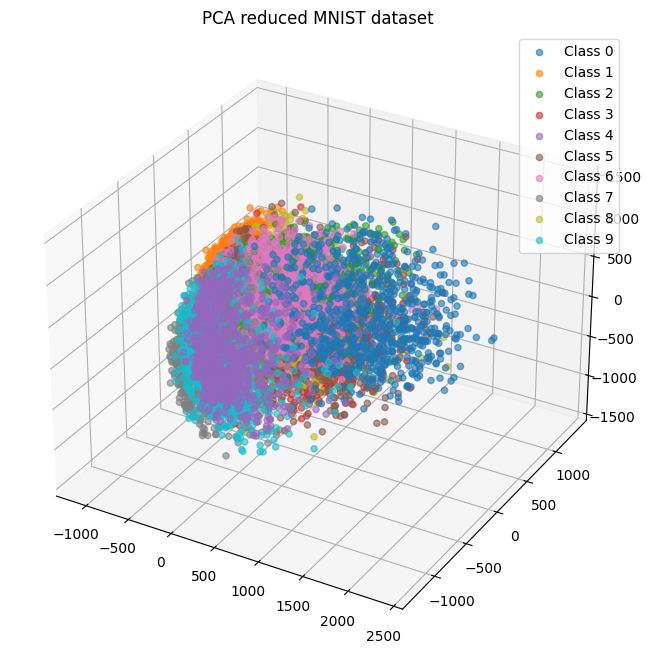

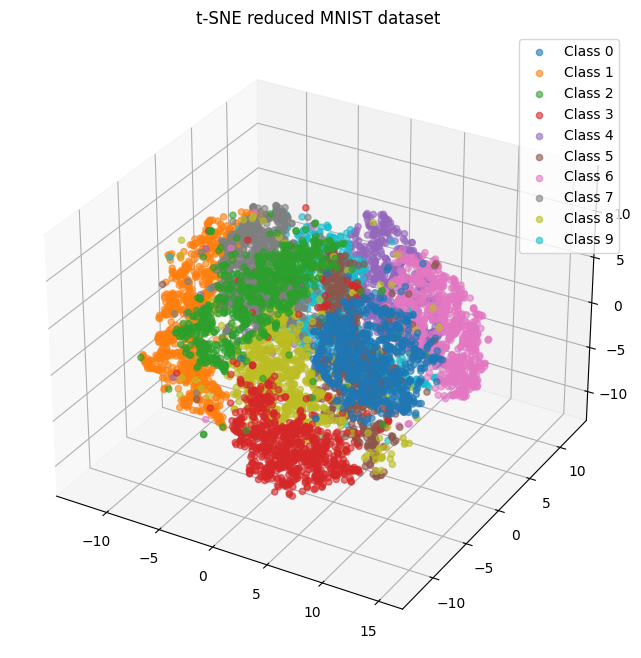

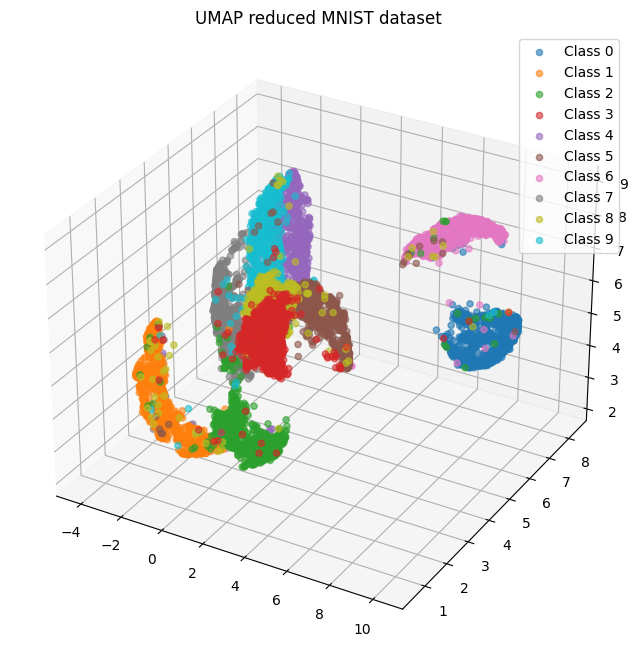

In [ ]:
# Function to plot the 3D scatter plot for the reduced dimensions
def plot_3d_scatter(X, y, title, labels):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for label in labels:
        indices = (y == label)
        ax.scatter(X[indices, 0], X[indices, 1], X[indices, 2], label=f'Class {label}', alpha=0.6)

    ax.legend()
    plt.title(title)
    plt.show()

# Plot PCA reduced dimensions
plot_3d_scatter(X_trainPCA, y_subset_train, 'PCA reduced MNIST dataset', range(10))

# Plot t-SNE reduced dimensions
plot_3d_scatter(X_trainTSNE, y_subset_train, 't-SNE reduced MNIST dataset', range(10))

# Plot UMAP reduced dimensions
plot_3d_scatter(X_trainUMAP, y_subset_train, 'UMAP reduced MNIST dataset', range(10))


In [ ]:
import plotly.express as px

def plot_3d_scatter_interactive(X, y, title, labels):
    # Create a DataFrame for the reduced dimensions and labels
    data = pd.DataFrame(X, columns=['x', 'y', 'z'])
    data['label'] = y

    # Create the interactive 3D scatter plot
    fig = px.scatter_3d(data, x='x', y='y', z='z', color='label', opacity=0.6,
                        color_continuous_scale=px.colors.qualitative.Plotly,
                        labels={'label': 'Class'},
                        title=title,
                        hover_name='label',
                        hover_data=['x', 'y', 'z'])

    # Customize the plot appearance
    fig.update_traces(marker=dict(size=4))
    fig.update_layout(scene=dict(xaxis_title='X',
                                  yaxis_title='Y',
                                  zaxis_title='Z'))

    # Show the plot
    fig.show()

# Plot PCA reduced dimensions
plot_3d_scatter_interactive(X_trainPCA, y_subset_train, 'PCA reduced MNIST dataset', range(10))

# Plot t-SNE reduced dimensions
plot_3d_scatter_interactive(X_trainTSNE, y_subset_train, 't-SNE reduced MNIST dataset', range(10))

# Plot UMAP reduced dimensions
plot_3d_scatter_interactive(X_trainUMAP, y_subset_train, 'UMAP reduced MNIST dataset', range(10))
